In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, Normalizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Admission Chance.csv')

In [ ]:
df.isna().sum()

,0
Serial No,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


<Axes: >

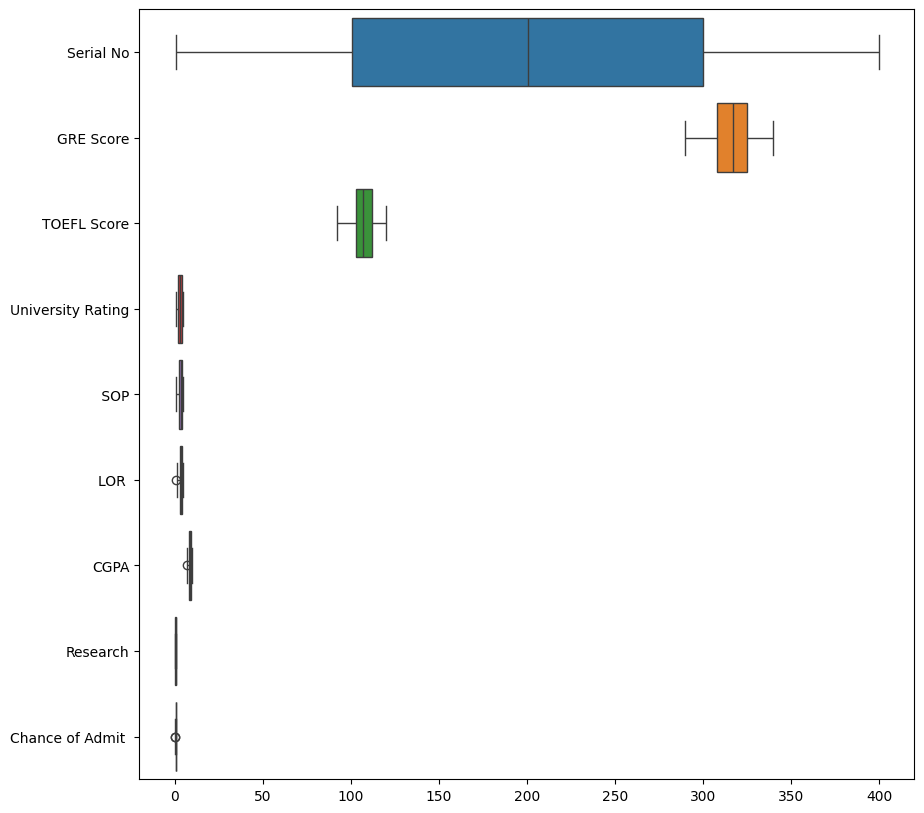

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df, orient='h')

In [ ]:
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split' : range(5,21),
    'min_samples_leaf' : range(1,10),
    'criterion': ['squared_error', 'absolute_error'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


In [ ]:
dtr = DecisionTreeRegressor()
cv = GridSearchCV(dtr, grid, cv=5)
cv.fit(X_train, y_train)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test,y_test))

Best Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 15}
Training_score: 0.765923116574286
Test_score: 0.7847464415319667


In [ ]:
st =  StandardScaler()
df_s = st.fit_transform(df)

In [ ]:
df = pd.DataFrame(df_s, columns = df.columns)

In [ ]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtr = DecisionTreeRegressor()
cv = GridSearchCV(dtr, grid, cv=5)
cv.fit(X_train, y_train)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test,y_test))

Best Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 7}
Training_score: 0.7669945710992665
Test_score: 0.7112849438180421


In [ ]:
df = pd.read_csv('Admission Chance.csv')

In [ ]:
nor =  Normalizer()
df_n = nor.fit_transform(df)
df = pd.DataFrame(df_n, columns = df.columns)
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtr = DecisionTreeRegressor()
cv = GridSearchCV(dtr, grid, cv=5)
cv.fit(X_train, y_train)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test,y_test))

Best Parameters: {'criterion': 'squared_error', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 11}
Training_score: 0.7138087700816241
Test_score: 0.7807392648274616
